In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_excel(r"C:\Users\User\Downloads\panel_new.xlsx")


In [7]:
df.columns


Index(['region', 'year', 'crime_rate', 'crime_people', 'crime_rate_severe',
       'crime_people_severe', 'crime_rate_econ', 'crime_people_econ',
       'crime_rate_corruption', 'grp', 'gini', 'poverty', 'youth', 'colleges',
       'uni', 'higher', 'secondary_prof', 'secondary_general', 'general',
       'uneduc', 'Federal_District', 'Bread_kg', 'Potatoes_kg',
       'Vegetables_kg', 'Fruits_kg', 'Meat_kg', 'Milk_kg', 'Eggs_units',
       'Fish_kg', 'Sugar_kg', 'Oil_kg', 'Magnium_g', 'gini_group'],
      dtype='object')

In [4]:
cols = [
    'crime_rate', 'crime_people', 'crime_rate_severe', 'crime_rate_corruption',
    'Bread_kg', 'Potatoes_kg', 'Vegetables_kg', 'Fruits_kg', 'Meat_kg',
    'Milk_kg', 'Eggs_units', 'Fish_kg', 'Sugar_kg', 'Oil_kg'
]

existing = [c for c in cols if c in df.columns]
missing = [c for c in cols if c not in df.columns]
print("Есть:", existing)
print("Нет:", missing)


Есть: ['crime_rate', 'crime_people', 'crime_rate_severe', 'crime_rate_corruption', 'Bread_kg', 'Potatoes_kg', 'Vegetables_kg', 'Fruits_kg', 'Meat_kg', 'Milk_kg', 'Eggs_units', 'Fish_kg', 'Sugar_kg', 'Oil_kg']
Нет: []


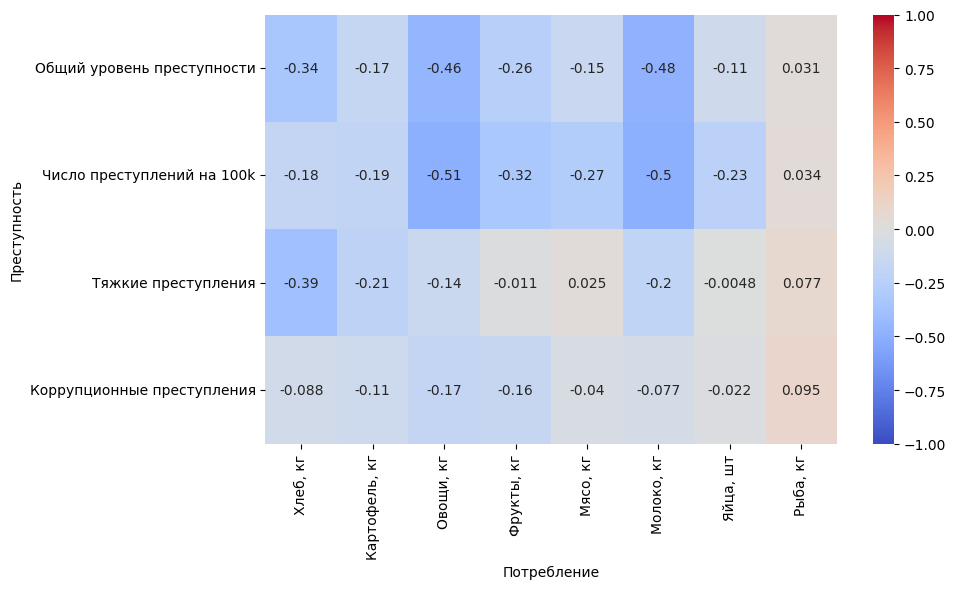

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

rename_map = {
    'crime_rate': 'Общий уровень преступности',
    'crime_people': 'Число преступлений на 100k',
    'crime_rate_severe': 'Тяжкие преступления',
    'crime_rate_corruption': 'Коррупционные преступления',
    'Bread_kg': 'Хлеб, кг',
    'Potatoes_kg': 'Картофель, кг',
    'Vegetables_kg': 'Овощи, кг',
    'Fruits_kg': 'Фрукты, кг',
    'Meat_kg': 'Мясо, кг',
    'Milk_kg': 'Молоко, кг',
    'Eggs_units': 'Яйца, шт',
    'Fish_kg': 'Рыба, кг',
    'Sugar_kg': 'Сахар, кг',
    'Oil_kg': 'Масло, кг'
}

crime_cols = ['crime_rate', 'crime_people', 'crime_rate_severe', 'crime_rate_corruption']
food_cols  = ['Bread_kg', 'Potatoes_kg', 'Vegetables_kg', 'Fruits_kg', 'Meat_kg',
              'Milk_kg', 'Eggs_units', 'Fish_kg']

crime_cols = [c for c in crime_cols if c in df.columns]
food_cols  = [c for c in food_cols  if c in df.columns]

corr = df[crime_cols + food_cols].corr().loc[crime_cols, food_cols]
corr_ru = corr.rename(index=rename_map, columns=rename_map)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_ru, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel('Потребление')
plt.ylabel('Преступность')
plt.tight_layout()
plt.show()
